In [282]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [283]:
data = pd.read_csv("Chicago_Energy_Benchmarking.csv")
data.head(2)

,Data Year,ID,Property Name,Reporting Status,Address,ZIP Code,Chicago Energy Rating,Exempt From Chicago Energy Rating,Community Area,Primary Property Type,...,Site EUI (kBtu/sq ft),Source EUI (kBtu/sq ft),Weather Normalized Site EUI (kBtu/sq ft),Weather Normalized Source EUI (kBtu/sq ft),Total GHG Emissions (Metric Tons CO2e),GHG Intensity (kg CO2e/sq ft),Latitude,Longitude,Location,Row_ID
0,2019,159005,Corliss HS -CPS,Not Submitted,821 E 103rd St,NaN,0.0,False,PULLMAN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,41.706496,-87.602690,"(41.70649646, -87.60268998)",2019-159005
1,2020,101716,311 S Wacker,Submitted Data,311 S Wacker,60606,4.0,False,LOOP,Office,...,48.1,134.6,50.3,140.9,10757.3,7.5,41.877458,-87.635738,"(41.87745822, -87.63573828)",2020-101716


In [284]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17728 entries, 0 to 17727
Data columns (total 30 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Data Year                                   17728 non-null  int64  
 1   ID                                          17728 non-null  int64  
 2   Property Name                               16535 non-null  object 
 3   Reporting Status                            17728 non-null  object 
 4   Address                                     17728 non-null  object 
 5   ZIP Code                                    16504 non-null  object 
 6   Chicago Energy Rating                       9739 non-null   float64
 7   Exempt From Chicago Energy Rating           10450 non-null  object 
 8   Community Area                              17637 non-null  object 
 9   Primary Property Type                       15107 non-null  object 
 10  Gross Floo

> Renaming the required column names for understandability.

In [285]:
data.rename(columns={'Data Year': 'Year', '# of Buildings': 'NumberOfBuildings', 'Chicago Energy Rating': 'CERating', 'Reporting Status': 'ReportingStatus', 'Site EUI (kBtu/sq ft)': 'SiteEUI', 'Source EUI (kBtu/sq ft)': 'SourceEUI', 'Electricity Use (kBtu)': 'ElectricityUse', 'ENERGY STAR Score':'ESTARScore', 'Total GHG Emissions (Metric Tons CO2e)': 'TotalGHGEmissions', 'GHG Intensity (kg CO2e/sq ft)': 'GHGIntensity'}, inplace=True)
data.rename(columns={'Gross Floor Area - Buildings (sq ft)': 'GrossFloorArea', 'Weather Normalized Site EUI (kBtu/sq ft)': 'WeatherNormSiteEUI', 'Weather Normalized Source EUI (kBtu/sq ft)': 'WeatherNormSourceEUI'}, inplace=True)
data.rename(columns={'Primary Property Type':'PrimaryPropertyType', 'Community Area': 'CommunityArea', 'Natural Gas Use (kBtu)': 'NaturalGasUse'}, inplace=True)

> Filtering the properties who have reported their Energy Usage, so that we can use the resultant data for modelling.

In [286]:
df = data[data['ReportingStatus'].isin(["Submitted","Submitted Data"])]
print("Size of the dataset available for modeling: ")
(df.shape[0], len(df.columns))

Size of the dataset available for modeling: 


(15269, 30)

In [287]:
total = df.isnull().sum().sort_values(ascending = False)
percent = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending = False)
missing_percentage = pd.concat([total, percent], axis = 1, keys = ['Total', 'PercentMissing'])
missing_percentage

,Total,PercentMissing
All Other Fuel Use (kBtu),15187,99.462964
District Steam Use (kBtu),14852,97.268976
District Chilled Water Use (kBtu),14718,96.391381
Water Use (kGal),12454,81.563953
CERating,7515,49.217369
Exempt From Chicago Energy Rating,7278,47.665204
WeatherNormSourceEUI,2585,16.929727
ESTARScore,2402,15.731220
NaturalGasUse,1468,9.614251
GHGIntensity,1294,8.474687


> Dropping Columns with more than 50% Missing Values and Values that can limit the model performanace such as Year, ID, Address, Row_ID, ReportingStatus, Latitide, Longitude, Location

In [288]:
df.drop(['Exempt From Chicago Energy Rating', 'Water Use (kGal)', 'District Chilled Water Use (kBtu)', 
         'District Steam Use (kBtu)', 'All Other Fuel Use (kBtu)', 'ZIP Code', 'ID', 'Address', 
         'ReportingStatus', 'Latitude', 'Longitude', 'Location', 'Row_ID', 'Year', 'Property Name', 'Year Built' ], axis=1, inplace=True)

<AxesSubplot:>

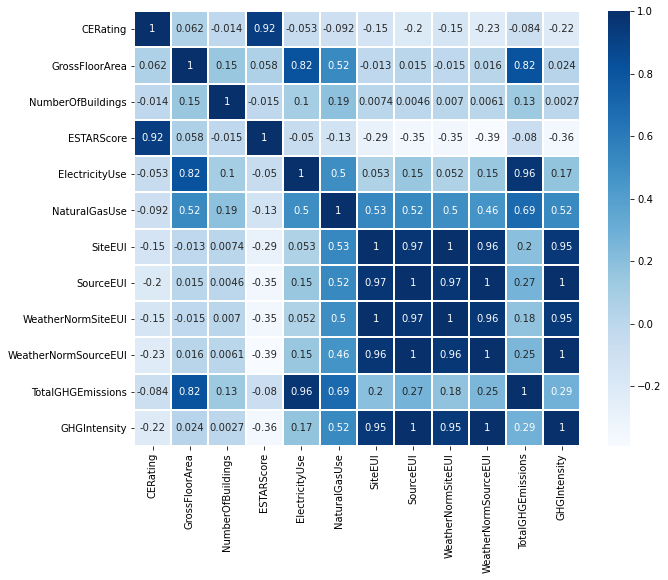

In [289]:
corr = df.corr()
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corr, cmap="Blues", annot=True, linewidths=1)

In [290]:
df.drop(['SourceEUI', 'WeatherNormSourceEUI', 'CERating', 'TotalGHGEmissions'], axis=1, inplace=True)

> Removed above columns as they thave correlation figures as follows

> SourceEUI - SiteEUI (97%) <br>
  WeatherNormSourceEUI - WeatherNormSiteEUI (96%) <br>
  CERating - ESTARScore (92%) <br>
  TotalGHGEmissions - ElectricityUse (96%) <br>

In [291]:
df['ERating'] = pd.cut(df['ESTARScore'],
                     bins = [1, 31 , 41, 51, 61, 71, 81, 101],
                     right=False,
                     labels=[1, 1.5, 2, 2.5, 3, 3.5, 4]
                    )

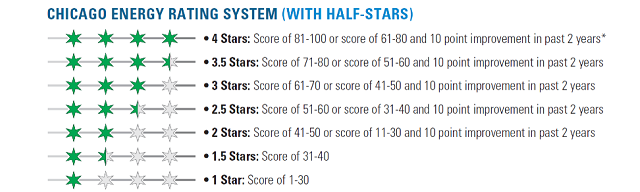

> Added a Column "ERating" and added labels following above information from 202 Chicago Energy Benchmarking Report.

In [292]:
df1 = df.copy()

In [293]:
df1.drop('ESTARScore', axis=1, inplace=True)

> Dropping 'ESTARScore' as we have new Target Variable 'ERating' 

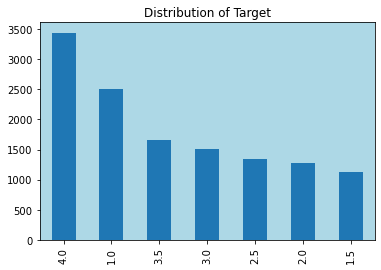

In [295]:
df1['ERating'].value_counts().plot.bar()
plt.title('Distribution of Target')
plt.grid(False);plt.show()

In [296]:
df1['ERating'] = pd.cut(df1['ERating'],
                     bins = [1, 2.1, 3.1,  4.1],
                     right=False,
                     labels=['C', 'B', 'A']
                    )

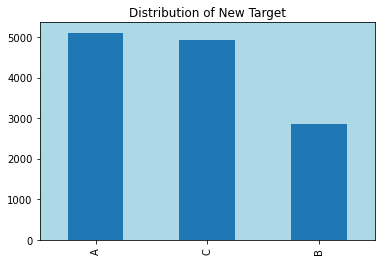

In [297]:
df1['ERating'].value_counts().plot.bar()
plt.title('Distribution of New Target')
plt.grid(False);plt.show()

> As this is imbalanced multiclass classification problems we choose to select "Recall_Macro" as our Scoring Metric in modeling.

In [302]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12867 entries, 1 to 17727
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   CommunityArea        12824 non-null  category
 1   PrimaryPropertyType  12730 non-null  category
 2   GrossFloorArea       12730 non-null  float64 
 3   NumberOfBuildings    12710 non-null  float64 
 4   ElectricityUse       12852 non-null  float64 
 5   NaturalGasUse        11893 non-null  float64 
 6   SiteEUI              12867 non-null  float64 
 7   WeatherNormSiteEUI   11935 non-null  float64 
 8   GHGIntensity         11860 non-null  float64 
 9   ERating              12867 non-null  category
dtypes: category(3), float64(7)
memory usage: 849.5 KB


# Feature Engineering:

In [299]:
df1['CommunityArea']=df1['CommunityArea'].astype('category')
df1['PrimaryPropertyType']=df1['PrimaryPropertyType'].astype('category')

In [317]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.impute import SimpleImputer
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [306]:
num_columns = ['GrossFloorArea','NumberOfBuildings','ElectricityUse', 'NaturalGasUse', 'SiteEUI','WeatherNormSiteEUI','GHGIntensity']
cat_columns = ['CommunityArea', 'PrimaryPropertyType']

num_pipeline = Pipeline([('impute_missing_vals', SimpleImputer(missing_values = np.NaN, strategy='mean')),('standardize_num', StandardScaler())])

cat_pipeline = Pipeline([('impute_missing_vals', SimpleImputer(missing_values= np.NaN,strategy='most_frequent')),('create_dummies_cats', OneHotEncoder(handle_unknown='ignore'))
                         ])

processing_pipeline = ColumnTransformer(transformers=[('proc_numeric', num_pipeline, num_columns),
                                                      ('create_dummies', cat_pipeline, cat_columns)])

processing_pipeline

ColumnTransformer(transformers=[('proc_numeric',
                                 Pipeline(steps=[('impute_missing_vals',
                                                  SimpleImputer()),
                                                 ('standardize_num',
                                                  StandardScaler())]),
                                 ['GrossFloorArea', 'NumberOfBuildings',
                                  'ElectricityUse', 'NaturalGasUse', 'SiteEUI',
                                  'WeatherNormSiteEUI', 'GHGIntensity']),
                                ('create_dummies',
                                 Pipeline(steps=[('impute_missing_vals',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('create_dummies_cats',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['CommunityArea', 'PrimaryPr

> Imputing Null values in Numerical Features with median values. <br>
> Imputing Null values in Categorical Features with Most Frequently listed Item.

In [307]:
featureCols = [x for x in df1.columns if x != 'ERating']
targetCol = 'ERating'

y = df1[targetCol]
x = df1[featureCols]

X_train, X_test, y_train, y_test = train_test_split(x, y,
                                                          test_size=0.2,
                                                          random_state = 123)
print(f'Target: {targetCol}')
print('Features:')
print(*featureCols, sep='\n')
print('\n')
print(f'Training examples: {X_train.shape[0]:,}')
print(f'Test examples: {X_test.shape[0]:,}')

Target: ERating
Features:
CommunityArea
PrimaryPropertyType
GrossFloorArea
NumberOfBuildings
ElectricityUse
NaturalGasUse
SiteEUI
WeatherNormSiteEUI
GHGIntensity


Training examples: 10,293
Test examples: 2,574


# Modeling:

# Logistic Regression - Grid Search

In [308]:
lm_pipe = Pipeline([('processing pipeline', processing_pipeline), 
              ('model', LogisticRegression(solver = 'liblinear', class_weight='balanced'))
             ])

params = {'model__C': [0.01, 0.1, 1, 10, 100]}
lr_gscv = GridSearchCV(lm_pipe, param_grid=params, scoring='recall_macro', cv=10, refit=True)
lr_gscv = lr_gscv.fit(X_train, y_train)

print(lr_gscv.best_estimator_)
print("\n")
print(f'Validation score: {lr_gscv.best_score_:.2%}')
print(f'Test score: {lr_gscv.score(X_test, y_test):.2%}')

Pipeline(steps=[('processing pipeline',
                 ColumnTransformer(transformers=[('proc_numeric',
                                                  Pipeline(steps=[('impute_missing_vals',
                                                                   SimpleImputer()),
                                                                  ('standardize_num',
                                                                   StandardScaler())]),
                                                  ['GrossFloorArea',
                                                   'NumberOfBuildings',
                                                   'ElectricityUse',
                                                   'NaturalGasUse', 'SiteEUI',
                                                   'WeatherNormSiteEUI',
                                                   'GHGIntensity']),
                                                 ('create_dummies',
                                              

In [309]:
lr_ypred = lr_gscv.predict(X_test)
print(classification_report(y_test, lr_ypred))

              precision    recall  f1-score   support

           A       0.73      0.84      0.78      1038
           B       0.46      0.21      0.29       565
           C       0.71      0.83      0.77       971

    accuracy                           0.70      2574
   macro avg       0.63      0.63      0.61      2574
weighted avg       0.66      0.70      0.67      2574



>As the classes are imbalanced, class_weight parameter configured as 'balanced'  to help the model in assigning relavant weights.

> Proceeding to Secondary Grid Search around the C Value received from Primary Grid Search to compare model performance.

In [310]:
params = {'model__C': [70, 80, 90, 100, 110, 120, 130]}
lrS_gscv = GridSearchCV(lm_pipe, param_grid=params, scoring='recall_macro', cv=10, refit=True)
lrS_gscv = lrS_gscv.fit(X_train, y_train)

print(lrS_gscv.best_estimator_)
print("\n")
print(f'Validation score: {lrS_gscv.best_score_:.2%}')
print(f'Test score: {lrS_gscv.score(X_test, y_test):.2%}')

Pipeline(steps=[('processing pipeline',
                 ColumnTransformer(transformers=[('proc_numeric',
                                                  Pipeline(steps=[('impute_missing_vals',
                                                                   SimpleImputer()),
                                                                  ('standardize_num',
                                                                   StandardScaler())]),
                                                  ['GrossFloorArea',
                                                   'NumberOfBuildings',
                                                   'ElectricityUse',
                                                   'NaturalGasUse', 'SiteEUI',
                                                   'WeatherNormSiteEUI',
                                                   'GHGIntensity']),
                                                 ('create_dummies',
                                              

> The GridSearch returned the same C Values even if tried Changing Hyper Parameter Value(C) range with in the vicinity of 100.
  Hence sticking with the C = 100


In [311]:
lrS_ypred = lrS_gscv.predict(X_test)
print(classification_report(y_test, lrS_ypred))

              precision    recall  f1-score   support

           A       0.73      0.84      0.78      1038
           B       0.46      0.21      0.29       565
           C       0.71      0.83      0.77       971

    accuracy                           0.70      2574
   macro avg       0.63      0.63      0.61      2574
weighted avg       0.66      0.70      0.67      2574



> The Precision, ReCall and F1-Score indicates no significant improvement over previous run as the C Value remain the     same. 

# ROC Curve - Logistic Regression

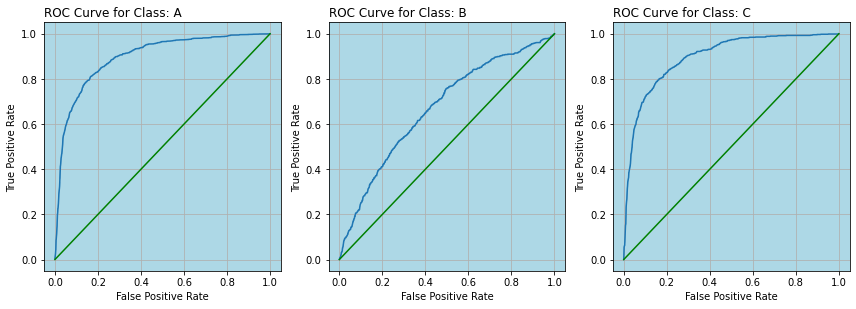

In [312]:
y_pred = lrS_gscv.predict(X_test)
y_proba = lrS_gscv.predict_proba(X_test)
classes = lrS_gscv.classes_


plt.figure(figsize = (12, 8))
bins = [i/20 for i in range(20)] + [1]
roc_auc_ovr = {}

for i in range(len(classes)):
    # Gets the class
    c = classes[i]    
    # Prepares an auxiliar dataframe to help with the plots
    df_aux = X_test.copy()
    df_aux['class'] = [1 if y == c else 0 for y in y_test]
    df_aux['prob'] = y_proba[:, i]
    df_aux = df_aux.reset_index(drop = True)

    # Calculates the ROC Coordinates and plots the ROC Curves
    ax_bottom = plt.subplot(2, 3, i+1)
    tpr, fpr = get_all_roc_coordinates(df_aux['class'], df_aux['prob'])
    plot_roc_curve(tpr, fpr, scatter = False, ax = ax_bottom)
    cx = "ROC Curve for Class: " + c
    ax_bottom.set_title(cx, loc='left')
    
    # Calculates the ROC AUC OvR
    roc_auc_ovr[c] = roc_auc_score(df_aux['class'], df_aux['prob'])   
plt.tight_layout()


In [313]:
# Displays the ROC AUC for each class
avg_roc_auc = 0
i = 0
for k in roc_auc_ovr:
    avg_roc_auc += roc_auc_ovr[k]
    i += 1
    print(f"{k} ROC AUC: {roc_auc_ovr[k]:.4f}")
print(f"Average ROC AUC: {avg_roc_auc/i:.4f}")

A ROC AUC: 0.8964
B ROC AUC: 0.6698
C ROC AUC: 0.8979
Average ROC AUC: 0.8214


> Above ROC Curves and AUC Suggests, Model Performance is better for both Class 'A' & 'C' as the model has 90% chance that it will be able  to distinguish between positive class and negative class compared to the Class 'B'(67%).

> With Average AUC Score of 82% Model performed considerably well.

# Decision Tree Classifier - Grid Search

In [314]:
pipeD = Pipeline([('processing pipeline', processing_pipeline), 
              ('model', DecisionTreeClassifier())
             ])

params = {'model__max_depth': [1, 3, 6, 9, 13, 15], 'model__min_samples_split' : [0.1, 0.2, 0.5, 0.7]}

dt_gscv = GridSearchCV(pipeD, param_grid=params, scoring='recall_macro', cv=10, refit=True)
dt_gscv = dt_gscv.fit(X_train, y_train)

print(dt_gscv.best_estimator_)
print("\n")
print(f'Validation score: {dt_gscv.best_score_:.2%}')
print(f'Test score: {dt_gscv.score(X_test, y_test):.2%}')

Pipeline(steps=[('processing pipeline',
                 ColumnTransformer(transformers=[('proc_numeric',
                                                  Pipeline(steps=[('impute_missing_vals',
                                                                   SimpleImputer()),
                                                                  ('standardize_num',
                                                                   StandardScaler())]),
                                                  ['GrossFloorArea',
                                                   'NumberOfBuildings',
                                                   'ElectricityUse',
                                                   'NaturalGasUse', 'SiteEUI',
                                                   'WeatherNormSiteEUI',
                                                   'GHGIntensity']),
                                                 ('create_dummies',
                                              

In [315]:
dt_pred = dt_gscv.predict(X_test)
print(classification_report(y_test, dt_pred))

              precision    recall  f1-score   support

           A       0.78      0.70      0.74      1038
           B       0.40      0.22      0.28       565
           C       0.63      0.86      0.73       971

    accuracy                           0.66      2574
   macro avg       0.60      0.59      0.58      2574
weighted avg       0.64      0.66      0.64      2574



> Proceeding to Secondary Grid Search to see if it can propose better hyperparameters.

In [318]:
pipeDS = Pipeline([('processing pipeline', processing_pipeline), 
              ('model', DecisionTreeClassifier())
             ])

params = {'model__max_depth': [13, 14, 15, 16, 17], 'model__min_samples_split' : [0.01, 0.03, 0.05, 0.1]}

dtS_gscv = GridSearchCV(pipeDS, param_grid=params, scoring='recall_macro', cv=10, refit=True)
dtS_gscv = dtS_gscv.fit(X_train, y_train)

print(dtS_gscv.best_estimator_)
print("\n")
print(f'Validation score: {dtS_gscv.best_score_:.2%}')
print(f'Test score: {dtS_gscv.score(X_test, y_test):.2%}')

Pipeline(steps=[('processing pipeline',
                 ColumnTransformer(transformers=[('proc_numeric',
                                                  Pipeline(steps=[('impute_missing_vals',
                                                                   SimpleImputer()),
                                                                  ('standardize_num',
                                                                   StandardScaler())]),
                                                  ['GrossFloorArea',
                                                   'NumberOfBuildings',
                                                   'ElectricityUse',
                                                   'NaturalGasUse', 'SiteEUI',
                                                   'WeatherNormSiteEUI',
                                                   'GHGIntensity']),
                                                 ('create_dummies',
                                              

In [319]:
dtS_ypred = dtS_gscv.predict(X_test)
print(classification_report(y_test, dtS_ypred))

              precision    recall  f1-score   support

           A       0.79      0.77      0.78      1038
           B       0.44      0.41      0.42       565
           C       0.75      0.80      0.77       971

    accuracy                           0.70      2574
   macro avg       0.66      0.66      0.66      2574
weighted avg       0.70      0.70      0.70      2574



> The Recall and F1-Scores for Class 'B' has been considerably improved while remaining combinations show significant improvements.

> Recall Macro Avg Accuracy of the model also improved from 59% to 66%.

> Hence fixating on below hyperparameters this model for future reference.<br>
    max_depth=16, min_samples_split=0.01

# ROC Curve - Decision Tree Classifier

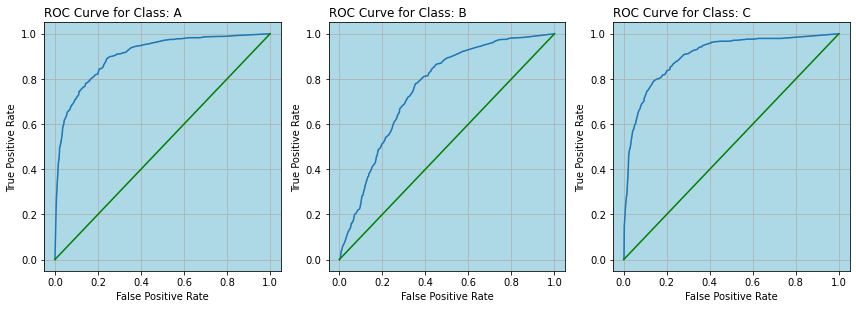

In [320]:
y_pred = dtS_gscv.predict(X_test)
y_proba = dtS_gscv.predict_proba(X_test)
classes = dtS_gscv.classes_

plt.figure(figsize = (12, 8))
bins = [i/20 for i in range(20)] + [1]
roc_auc_ovr = {}

for i in range(len(classes)):
    # Gets the class
    c = classes[i]    
    # Prepares an auxiliar dataframe to help with the plots
    df_aux = X_test.copy()
    df_aux['class'] = [1 if y == c else 0 for y in y_test]
    df_aux['prob'] = y_proba[:, i]
    df_aux = df_aux.reset_index(drop = True)

    # Calculates the ROC Coordinates and plots the ROC Curves
    ax_bottom = plt.subplot(2, 3, i+1)
    tpr, fpr = get_all_roc_coordinates(df_aux['class'], df_aux['prob'])
    plot_roc_curve(tpr, fpr, scatter = False, ax = ax_bottom)
    cx = "ROC Curve for Class: " + c
    ax_bottom.set_title(cx, loc='left')
    
    # Calculates the ROC AUC OvR
    roc_auc_ovr[c] = roc_auc_score(df_aux['class'], df_aux['prob'])   
plt.tight_layout()


In [321]:
# Displays the ROC AUC for each class
avg_roc_auc = 0
i = 0
for k in roc_auc_ovr:
    avg_roc_auc += roc_auc_ovr[k]
    i += 1
    print(f"{k} ROC AUC: {roc_auc_ovr[k]:.4f}")
print(f"Average ROC AUC: {avg_roc_auc/i:.4f}")

A ROC AUC: 0.9056
B ROC AUC: 0.7554
C ROC AUC: 0.9027
Average ROC AUC: 0.8546


> Above ROC Curves and AUC Suggests, Model Performance is better for both Class 'A' & 'C' as model has 90% chance that it will be able  to distinguish between positive class and negative class compared to the Class 'B' (76%).

> With Averga AUC Score of 85% Decision Tree Model relatively out-performed Logistic Regression.

# Ensemble - Gradient Boosting Classifier

> Let's move ahead and see how combination of decision trees will work through Ensemble - Gradient Boosting

In [322]:
pipeGB = Pipeline([('processing', processing_pipeline),
             ('gb', GradientBoostingClassifier())])

params = {'gb__max_depth': [1, 2, 3],
         'gb__n_estimators': [50, 100, 200]
         }

gb_gscv = GridSearchCV(pipeGB, param_grid = params, cv=10, scoring='recall_macro')
gb_gscv = gb_gscv.fit(X_train, y_train)

print(gb_gscv.best_estimator_)
print("\n")
print(f'Validation score: {gb_gscv.best_score_:.2%}')
print(f'Test score: {gb_gscv.score(X_test, y_test):.2%}')

Pipeline(steps=[('processing',
                 ColumnTransformer(transformers=[('proc_numeric',
                                                  Pipeline(steps=[('impute_missing_vals',
                                                                   SimpleImputer()),
                                                                  ('standardize_num',
                                                                   StandardScaler())]),
                                                  ['GrossFloorArea',
                                                   'NumberOfBuildings',
                                                   'ElectricityUse',
                                                   'NaturalGasUse', 'SiteEUI',
                                                   'WeatherNormSiteEUI',
                                                   'GHGIntensity']),
                                                 ('create_dummies',
                                                  Pipel

In [323]:
gb_ypred = gb_gscv.predict(X_test)
print(classification_report(y_test, gb_ypred))

              precision    recall  f1-score   support

           A       0.81      0.84      0.83      1038
           B       0.50      0.36      0.42       565
           C       0.76      0.85      0.80       971

    accuracy                           0.74      2574
   macro avg       0.69      0.68      0.68      2574
weighted avg       0.72      0.74      0.73      2574



In [324]:
params = {'gb__max_depth': [1, 3],
         'gb__n_estimators': [200, 300, 400]
         }

gbS_gscv = GridSearchCV(pipeGB, param_grid = params, cv=10, scoring='recall_macro', verbose = 5)
gbS_gscv = gbS_gscv.fit(X_train, y_train)
print("\n")
gbS_gscv.best_estimator_
print("\n")
print(f'Validation score: {gb_gscv.best_score_:.2%}')
print(f'Test score: {gb_gscv.score(X_test, y_test):.2%}')

Fitting 10 folds for each of 6 candidates, totalling 60 fits
[CV 1/10] END .........gb__max_depth=1, gb__n_estimators=200; total time=   5.0s
[CV 2/10] END .........gb__max_depth=1, gb__n_estimators=200; total time=   5.1s
[CV 3/10] END .........gb__max_depth=1, gb__n_estimators=200; total time=   5.0s
[CV 4/10] END .........gb__max_depth=1, gb__n_estimators=200; total time=   5.0s
[CV 5/10] END .........gb__max_depth=1, gb__n_estimators=200; total time=   5.1s
[CV 6/10] END .........gb__max_depth=1, gb__n_estimators=200; total time=   5.8s
[CV 7/10] END .........gb__max_depth=1, gb__n_estimators=200; total time=   5.0s
[CV 8/10] END .........gb__max_depth=1, gb__n_estimators=200; total time=   5.4s
[CV 9/10] END .........gb__max_depth=1, gb__n_estimators=200; total time=   5.4s
[CV 10/10] END ........gb__max_depth=1, gb__n_estimators=200; total time=   5.5s
[CV 1/10] END .........gb__max_depth=1, gb__n_estimators=300; total time=   7.8s
[CV 2/10] END .........gb__max_depth=1, gb__n_es

In [325]:
gbS_ypred = gbS_gscv.predict(X_test)
print(classification_report(y_test, gbS_ypred))

              precision    recall  f1-score   support

           A       0.82      0.85      0.83      1038
           B       0.52      0.39      0.44       565
           C       0.77      0.85      0.81       971

    accuracy                           0.75      2574
   macro avg       0.70      0.70      0.70      2574
weighted avg       0.73      0.75      0.74      2574



> The Precsion, Recall and F1-Scores for all the classes seen significant improvement.

> Recall Macro Avg Accuracy of the model also improved from 68% to 70%.

> Hence fixating on below hyperparameter and this model for future reference.<br>
    n_estimators=400

# ROC Curve - Gradient Boosting Classifier

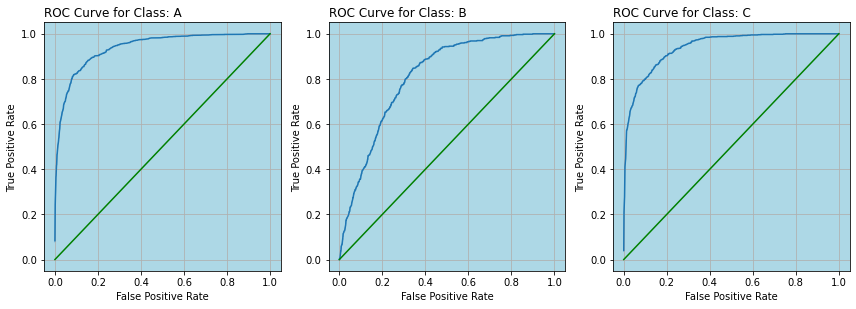

In [326]:
y_pred = gbS_gscv.predict(X_test)
y_proba = gbS_gscv.predict_proba(X_test)
classes = gbS_gscv.classes_

plt.figure(figsize = (12, 8))
bins = [i/20 for i in range(20)] + [1]
roc_auc_ovr = {}

for i in range(len(classes)):
    # Gets the class
    c = classes[i]    
    # Prepares an auxiliar dataframe to help with the plots
    df_aux = X_test.copy()
    df_aux['class'] = [1 if y == c else 0 for y in y_test]
    df_aux['prob'] = y_proba[:, i]
    df_aux = df_aux.reset_index(drop = True)

    # Calculates the ROC Coordinates and plots the ROC Curves
    ax_bottom = plt.subplot(2, 3, i+1)
    tpr, fpr = get_all_roc_coordinates(df_aux['class'], df_aux['prob'])
    plot_roc_curve(tpr, fpr, scatter = False, ax = ax_bottom)
    cx = "ROC Curve for Class: " + c
    ax_bottom.set_title(cx, loc='left')
    
    # Calculates the ROC AUC OvR
    roc_auc_ovr[c] = roc_auc_score(df_aux['class'], df_aux['prob'])   
plt.tight_layout()


In [327]:
# Displays the ROC AUC for each class
avg_roc_auc = 0
i = 0
for k in roc_auc_ovr:
    avg_roc_auc += roc_auc_ovr[k]
    i += 1
    print(f"{k} ROC AUC: {roc_auc_ovr[k]:.4f}")
print(f"Average ROC AUC: {avg_roc_auc/i:.4f}")

A ROC AUC: 0.9390
B ROC AUC: 0.8082
C ROC AUC: 0.9412
Average ROC AUC: 0.8961


> Above ROC Curves and AUC Suggests, Model Performance is better for both Class 'A' & 'C' as model has 94% chance that it will     be able  to distinguish between positive class and negative class compared to the Class 'B' (81%).

> With Averga AUC Score of 90% Gradient Booting Classifier Model relatively out-performed Logistic Regression & Decision Tree.

# Observations & Conclusions:

In [330]:
print(f'Logistic Regression: {lrS_gscv.score(X_test, y_test):.2%}')
print(f'Decision Tree: {dtS_gscv.score(X_test, y_test):.2%}')
print(f'Gradient Boosting: {gbS_gscv.score(X_test, y_test):.2%}')

print("******************* Logistic Regression CR ***********************\n")
print(classification_report(y_test, lrS_ypred))
print("****************** Decision Tree Classifier CR ********************\n")
print(classification_report(y_test, dtS_ypred))
print("****************** Gradient Boosting Classifier CR ****************\n")
print(classification_report(y_test, gbS_ypred))

Logistic Regression: 62.50%
Decision Tree: 65.85%
Gradient Boosting: 69.61%
******************* Logistic Regression CR ***********************

              precision    recall  f1-score   support

           A       0.73      0.84      0.78      1038
           B       0.46      0.21      0.29       565
           C       0.71      0.83      0.77       971

    accuracy                           0.70      2574
   macro avg       0.63      0.63      0.61      2574
weighted avg       0.66      0.70      0.67      2574

****************** Decision Tree Classifier CR ********************

              precision    recall  f1-score   support

           A       0.79      0.77      0.78      1038
           B       0.44      0.41      0.42       565
           C       0.75      0.80      0.77       971

    accuracy                           0.70      2574
   macro avg       0.66      0.66      0.66      2574
weighted avg       0.70      0.70      0.70      2574

****************** Gradie

> We can choose Gradient Boosting Classifier model to generalize the population for following reasons.
> 1) The Recall Macro Avg Score has been 70% compared to 63% and 66% of logistic regression and Decision Tree Respectively.<br>
  2) Precision, Recall & F1-Scores are better than both logistic regression and Decision Tree. <br>
  3) Model Accuracy has been 75% which is relatively better in Comparision.

# Functions:

In [244]:
def get_all_roc_coordinates(y_real, y_proba):
    '''
    Calculates all the ROC Curve coordinates (tpr and fpr) by considering each point as a treshold for the predicion of the class.
    
    Args:
        y_real: The list or series with the real classes.
        y_proba: The array with the probabilities for each class, obtained by using the `.predict_proba()` method.
        
    Returns:
        tpr_list: The list of TPRs representing each threshold.
        fpr_list: The list of FPRs representing each threshold.
    '''
    tpr_list = [0]
    fpr_list = [0]
    for i in range(len(y_proba)):
        threshold = y_proba[i]
        y_pred = y_proba >= threshold
        tpr, fpr = calculate_tpr_fpr(y_real, y_pred)
        tpr_list.append(tpr)
        fpr_list.append(fpr)
    return tpr_list, fpr_list

In [245]:
def calculate_tpr_fpr(y_real, y_pred):
    '''
    Calculates the True Positive Rate (tpr) and the True Negative Rate (fpr) based on real and predicted observations
    
    Args:
        y_real: The list or series with the real classes
        y_pred: The list or series with the predicted classes
        
    Returns:
        tpr: The True Positive Rate of the classifier
        fpr: The False Positive Rate of the classifier
    '''
    
    # Calculates the confusion matrix and recover each element
    cm = confusion_matrix(y_real, y_pred)
    TN = cm[0, 0]
    FP = cm[0, 1]
    FN = cm[1, 0]
    TP = cm[1, 1]
    
    # Calculates tpr and fpr
    tpr =  TP/(TP + FN) # sensitivity - true positive rate
    fpr = 1 - TN/(TN+FP) # 1-specificity - false positive rate
    
    return tpr, fpr

In [277]:
def plot_roc_curve(tpr, fpr, scatter = True, ax = None):
    '''
    Plots the ROC Curve by using the list of coordinates (tpr and fpr).
    
    Args:
        tpr: The list of TPRs representing each coordinate.
        fpr: The list of FPRs representing each coordinate.
        scatter: When True, the points used on the calculation will be plotted with the line (default = True).
    '''
    if ax == None:
        plt.figure(figsize = (5, 5))
        ax = plt.axes()
    
    if scatter:
        sns.scatterplot(x = fpr, y = tpr, ax = ax)
    sns.lineplot(x = fpr, y = tpr, ax = ax)
    sns.lineplot(x = [0, 1], y = [0, 1], color = 'green', ax = ax)
    plt.xlim(-0.05, 1.05)
    plt.ylim(-0.05, 1.05)
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.rcParams['axes.facecolor'] = 'lightblue'
    plt.grid(True)

Reference for ROC Curve:

https://github.com/vinyluis/Articles/blob/main/ROC%20Curve%20and%20ROC%20AUC/ROC%20Curve%20-%20Multiclass.ipynb
    